In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [37]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df[df["bmi"].isna()].value_counts(subset=["stroke"])

stroke
0         161
1          40
dtype: int64

In [7]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

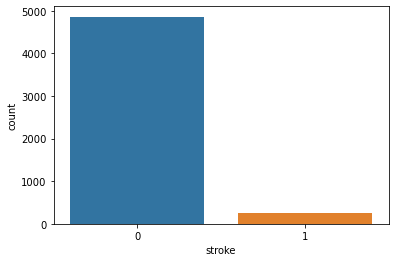

In [8]:
sns.countplot(data=df,x="stroke")

In [9]:
df1 = df.dropna(axis=0, subset=["bmi"])

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


<AxesSubplot:>

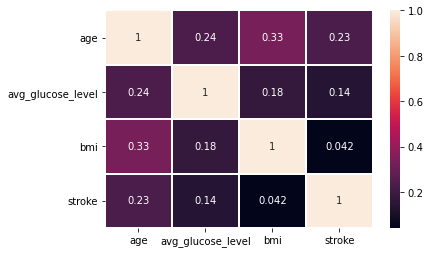

In [35]:
sns.heatmap(data=df1[["age","avg_glucose_level", "bmi", "stroke"]].corr(), annot=True, linewidths=1)

In [11]:
df1.value_counts(subset=["stroke"])

stroke
0         4700
1          209
dtype: int64

In [12]:
print(f"Stroke proportion in data set: {round((df1['stroke'] == 1).sum()/len(df1.index) * 100,3)}%")

Stroke proportion in data set: 4.257%


In [13]:
#Drop gender value Other
df1.drop(df1[df1["gender"]=="Other"].index, axis=0, inplace=True)

C:\Users\libor\anaconda3\envs\ml_course\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df1_obj = df1.select_dtypes(include="object")

In [15]:
df1_dummy = pd.get_dummies(df1_obj,drop_first=True)

In [16]:
df1_num = df1.select_dtypes(exclude="object")

In [17]:
df1_num

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
5,56669,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [18]:
df1_new = pd.concat([df1_num, df1_dummy],axis=1)

In [19]:
df1_new.drop("id", axis=1, inplace=True)

In [20]:
df1_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0


In [21]:
X = df1_new.drop("stroke", axis=1)
y = df1_new["stroke"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_s_train = scaler.fit_transform(X_train)

In [27]:
X_s_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [29]:
log_model = LogisticRegression(max_iter=100, solver='saga' )

In [30]:
penalty = ["l1","l2","elasticnet"]
l1_ratio = np.linspace(0,1,10)
C = np.logspace(0,10,20)
param_grid = {"penalty":penalty,"l1_ratio":l1_ratio, "C":C}

In [31]:
grid_model = GridSearchCV(log_model, param_grid=param_grid, cv=5)

In [32]:
#grid_model.fit(X_s_train,y_train)

In [33]:
grid_model.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
grid_model.

In [ ]:
y_pred = grid_model.predict(X_s_test)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
plot_confusion_matrix(grid_model, X_s_test,y_test)

In [ ]:
grid_model.best_score_